In [33]:
import pandas as pd
import matplotlib.pyplot as plt # For basic plotting
import seaborn as sns # For enhanced visualizations
import numpy as np
import sys

# --- Mini Project: Titanic Dataset ---
# Ensure 'titanic.csv' is in the same directory or provide the full path.


titanic_df = pd.read_csv('../titanic.csv')

print("\n--- 1. Initial Exploration ---")
print("Shape of the dataset:", titanic_df.shape)
print("\nFirst 5 rows:")
print(titanic_df.head())
print("\nDataset info:")
titanic_df.info()
print("\nDescriptive statistics:")
print(titanic_df.describe(include='all')) # include='all' to see stats for non-numeric too



--- 1. Initial Exploration ---
Shape of the dataset: (891, 15)

First 5 rows:
   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       No

In [34]:

print("\n--- 2. Data Cleaning ---")
# Check for missing values
print("\nMissing values per column:")
print(titanic_df.isnull().sum())

# Handle missing 'Age': Fill with median age
median_age = titanic_df['age'].median()
titanic_df['age'].fillna(median_age, inplace=True)
print(f"\nMissing 'Age' values filled with median: {median_age}")

# Handle missing 'Embarked': Fill with the mode (most frequent value)
mode_embarked = titanic_df['embarked'].mode()[0] # mode() returns a Series, take the first element
titanic_df['embarked'].fillna(mode_embarked, inplace=True)
print(f"Missing 'Embarked' values filled with mode: {mode_embarked}")

# Handle missing 'Deck': Many missing. For simplicity, we might drop it or fill with 'Unknown'.
# For ML, this might involve more sophisticated handling (e.g., feature engineering based on presence).
titanic_df['Deck_Known'] = titanic_df['deck'].notnull().astype(int) # Feature: Is Deck known?
titanic_df.drop('deck', axis=1, inplace=True) # Drop original 'Deck' column
print("\n'Deck' column processed: created 'Dec_Known' and dropped original.")

# Check missing values again
print("\nMissing values after cleaning:")
print(titanic_df.isnull().sum())




--- 2. Data Cleaning ---

Missing values per column:
survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

Missing 'Age' values filled with median: 28.0
Missing 'Embarked' values filled with mode: S

'Deck' column processed: created 'Dec_Known' and dropped original.

Missing values after cleaning:
survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    2
alive          0
alone          0
Deck_Known     0
dtype: int64


/var/folders/7j/qr6tvgr97s3b65k1tx46fry80000gn/T/ipykernel_66342/4290090185.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_df['age'].fillna(median_age, inplace=True)
/var/folders/7j/qr6tvgr97s3b65k1tx46fry80000gn/T/ipykernel_66342/4290090185.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values a


--- 3. Basic Insights & Visualization ---

Overall Survival Rate: 38.38%

Survival rate by Sex:
sex
female    0.742038
male      0.188908
Name: survived, dtype: float64


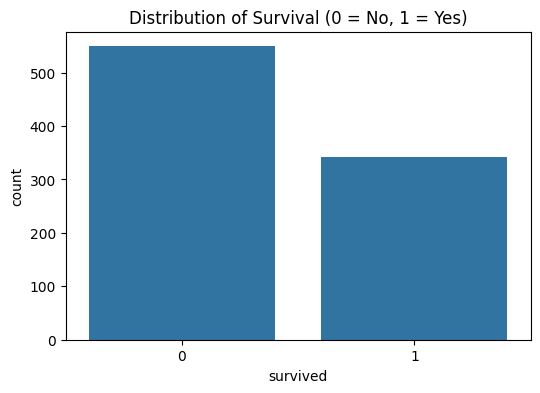

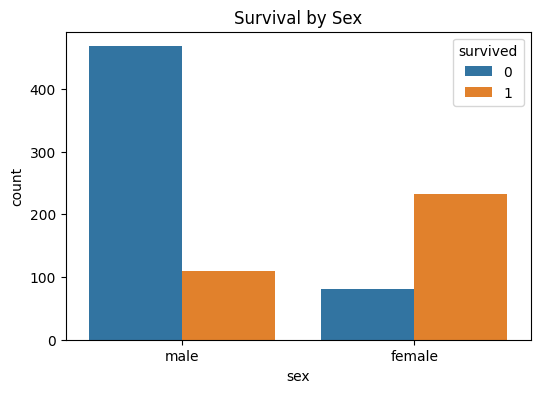

In [35]:

print("\n--- 3. Basic Insights & Visualization ---")
# Survival Rate
survival_rate = titanic_df['survived'].mean()
print(f"\nOverall Survival Rate: {survival_rate:.2%}")

# Survival rate by Sex
print("\nSurvival rate by Sex:")
print(titanic_df.groupby('sex')['survived'].mean())

if 'seaborn' in sys.modules and 'matplotlib' in sys.modules:
    plt.figure(figsize=(6,4))
    sns.countplot(x='survived', data=titanic_df)
    plt.title('Distribution of Survival (0 = No, 1 = Yes)')
    plt.show()

    plt.figure(figsize=(6,4))
    sns.countplot(x='sex', hue='survived', data=titanic_df)
    plt.title('Survival by Sex')
    plt.show()


In [36]:

# Survival rate by Passenger Class (Pclass)
print("\nSurvival rate by class:")
print(titanic_df.groupby('class')['survived'].mean())



Survival rate by class:
class
First     0.629630
Second    0.472826
Third     0.242363
Name: survived, dtype: float64


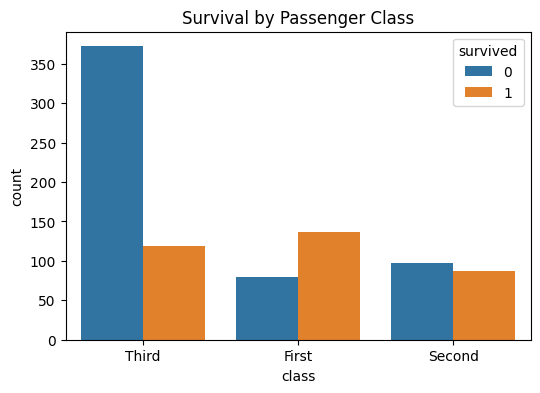

In [37]:

if 'seaborn' in sys.modules and 'matplotlib' in sys.modules:
    plt.figure(figsize=(6,4))
    sns.countplot(x='class', hue='survived', data=titanic_df)
    plt.title('Survival by Passenger Class')
    plt.show()


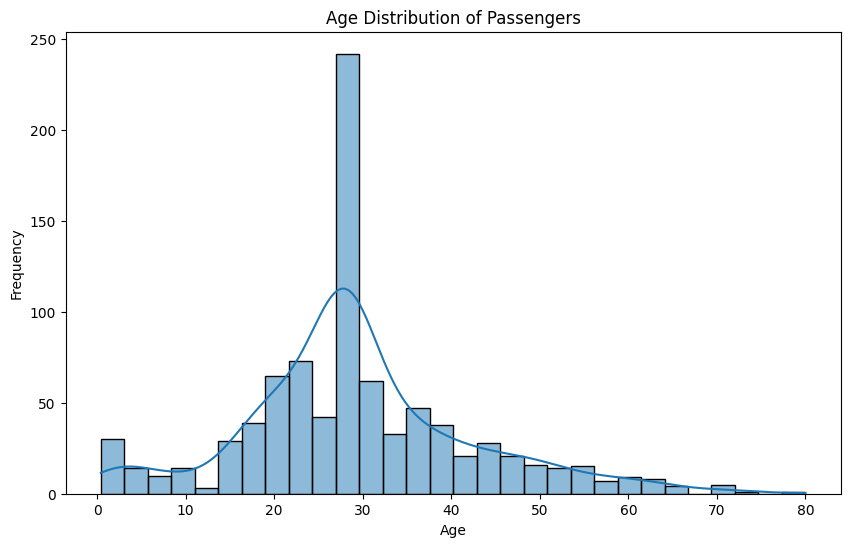

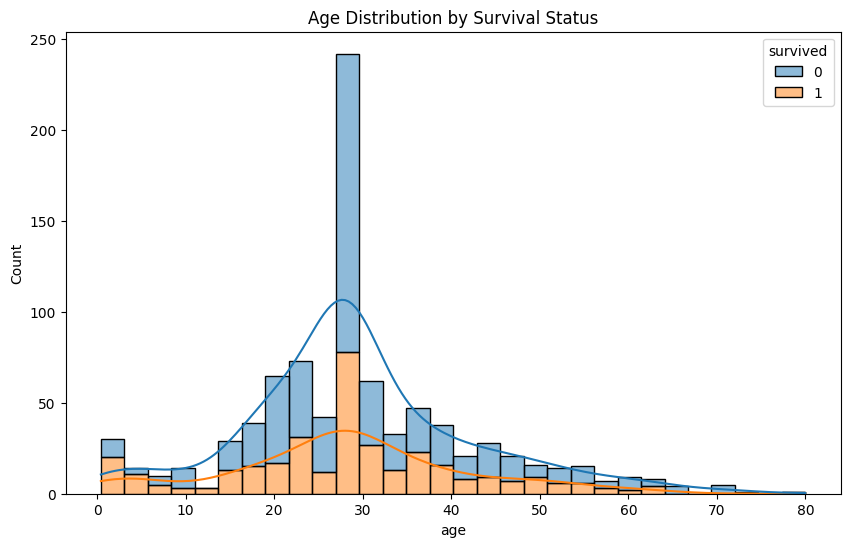

In [38]:

# Age distribution
if 'seaborn' in sys.modules and 'matplotlib' in sys.modules:
    plt.figure(figsize=(10,6))
    sns.histplot(titanic_df['age'], kde=True, bins=30)
    plt.title('Age Distribution of Passengers')
    plt.xlabel('Age')
    plt.ylabel('Frequency')
    plt.show()

    # Age distribution by survival
    plt.figure(figsize=(10,6))
    sns.histplot(data=titanic_df, x='age', hue='survived', kde=True, multiple="stack")
    plt.title('Age Distribution by Survival Status')
    plt.show()




Survival rate by FamilySize:
FamilySize
4     0.724138
3     0.578431
2     0.552795
7     0.333333
1     0.303538
5     0.200000
6     0.136364
8     0.000000
11    0.000000
Name: survived, dtype: float64


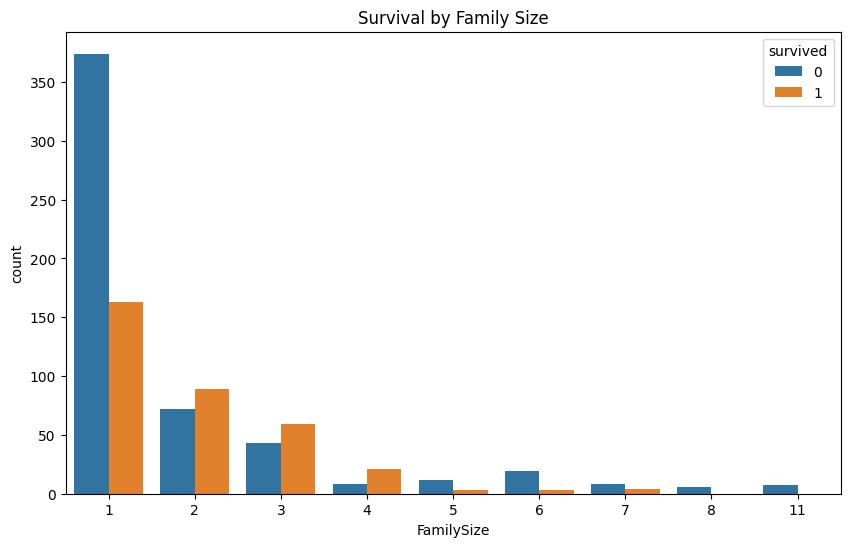

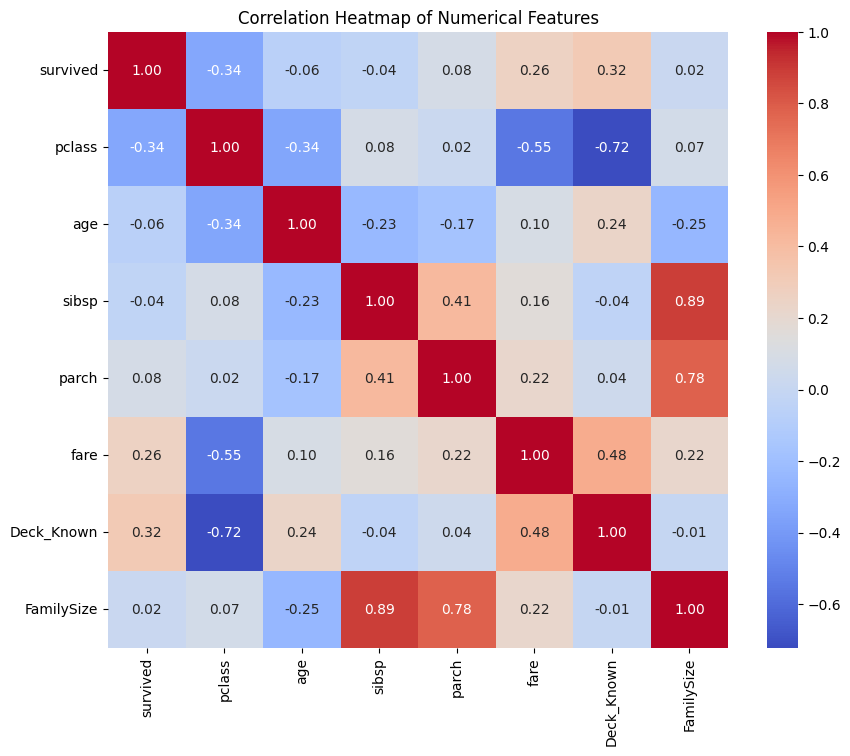

In [42]:

# Feature Engineering Example: FamilySize
titanic_df['FamilySize'] = titanic_df['sibsp'] + titanic_df['parch'] + 1
print("\nSurvival rate by FamilySize:")
print(titanic_df.groupby('FamilySize')['survived'].mean().sort_values(ascending=False))

if 'seaborn' in sys.modules and 'matplotlib' in sys.modules:
    plt.figure(figsize=(10,6))
    sns.countplot(x='FamilySize', hue='survived', data=titanic_df)
    plt.title('Survival by Family Size')
    plt.show()

# Correlation heatmap for numerical features (requires only numerical columns)
numerical_df = titanic_df.select_dtypes(include=np.number) # Select only numerical columns
# It's good practice to drop IDs if they are not meaningful for correlation
if 'PassengerId' in numerical_df.columns:
    numerical_df = numerical_df.drop('PassengerId', axis=1)

if 'seaborn' in sys.modules and 'matplotlib' in sys.modules and not numerical_df.empty:
    plt.figure(figsize=(10, 8))
    sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation Heatmap of Numerical Features')
    plt.show()
else:
    print("\nSkipping heatmap as no numerical columns were found or plotting libraries are missing.")

# Further insights:
# - Survival rate by Embarked location.
# - Fare distribution and its relation to survival.
# - Relationship between Age, Pclass, and Survival.